In [1]:
import networkx as nx
import dependency
import sentence_attentions

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import numpy as np

from itertools import cycle

%matplotlib inline

In [2]:
attention_file = '../BertAA/attentions.npz'
token_file = '../BertAA/source.txt'

maxlen = 1000

fontsize=8

#this is necessary in this case
eos =True
no_softmax = True

conllu_file_name = '../data/entest.conllu'

dependency_rels = dependency.read_conllu(conllu_file_name, directional=True)

with open(token_file) as tokens_file:
    tokens_loaded = [l.split() for l in tokens_file]
    
attentions_loaded = np.load(attention_file)
sentences_count = 1000
layers_count = attentions_loaded['arr_0'].shape[0]
heads_count = attentions_loaded['arr_0'].shape[1]

In [3]:
attention_gen = sentence_attentions.generate_matrices(attentions_loaded, tokens_loaded, eos, no_softmax, maxlen,)
attention_gen = enumerate(attention_gen)

##  Plot graphs

98
for these reasons , i voted for this report .


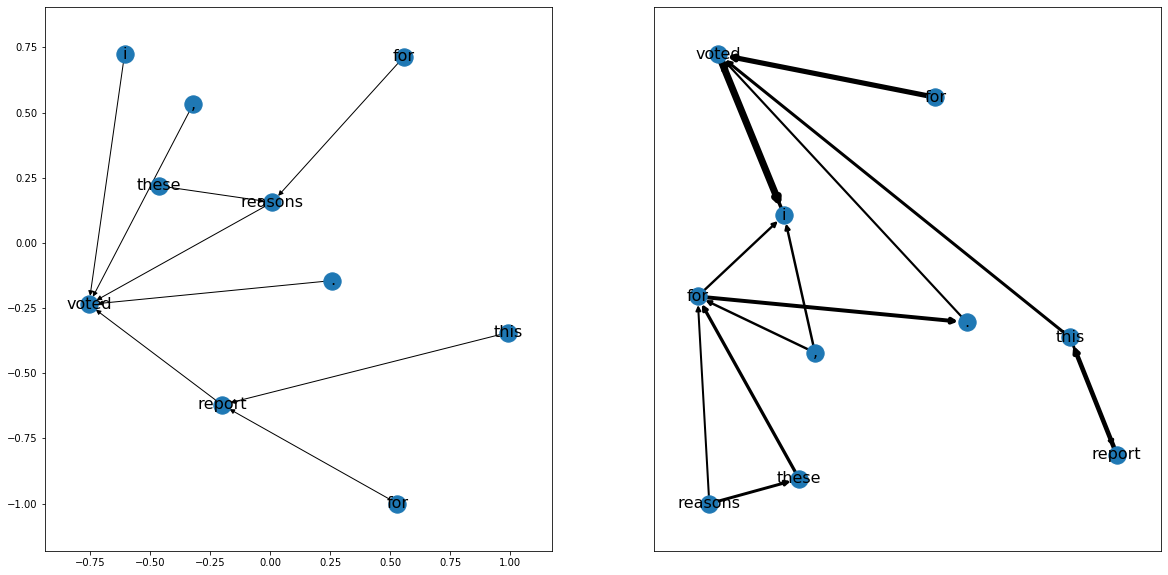

In [33]:
for sentence_index, matrices in attention_gen:
    tokens_list = tokens_loaded[sentence_index]
    words = ' '.join(tokens_list).replace('@@ ', '')
    words_list = words.split()# + ['root']
    if len(words_list) < 16:
        break

print(sentence_index)
print(words)

tokens_list = tokens_loaded[sentence_index]
words = ' '.join(tokens_list).replace('@@ ', '')
words_list = words.split()# + ['root']
all_deps  = dependency_rels[sentence_index]['all-d2p']


DG=nx.DiGraph()
DG.add_edges_from(all_deps)

labels = {}
for node in DG.nodes():
    labels[node] = words_list[node]
posG = nx.spring_layout(DG)


l=[4,7,8]
h=[10, 11, 10]

aggr_matrix = np.mean(np.array(matrices)[l,h,:,:], axis=0)

AG = nx.from_numpy_matrix(aggr_matrix, parallel_edges=True, create_using=nx.DiGraph)

elarge = [(u, v) for (u, v, d) in AG.edges(data=True) if d['weight'] > 0.2]
weights = [AG[u][v]['weight']*10 for u,v in elarge]
posA = nx.spring_layout(AG)



fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))


nx.draw_networkx_nodes(DG, posG, ax=ax1)
nx.draw_networkx_edges(DG, posG, ax=ax1)
nx.draw_networkx_labels(DG, posG,labels, font_size=16, ax=ax1)

nx.draw_networkx_nodes(AG, posA, ax=ax2)
nx.draw_networkx_edges(AG, posA,edgelist=elarge, width=weights, ax=ax2)
nx.draw_networkx_labels(AG, posA,labels, font_size=16, ax=ax2)





plt.show()

In [30]:
AG.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14))

In [31]:
DG.nodes()

NodeView((0, 5, 1, 2, 3, 4, 6, 9, 7, 8, 10, 11, 12, 13, 14))